import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
## One-way ANOVA

<b>An</b>alysis <b> of V</b>ariance

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

In [11]:
bike_sharing_data = pd.read_csv('./datasets/day.csv')

bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
bike_sharing_data.shape

(731, 16)

In [13]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [15]:
bike_sharing_data.groupby('weathersit')['cnt'].describe()


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


<IPython.core.display.Javascript object>

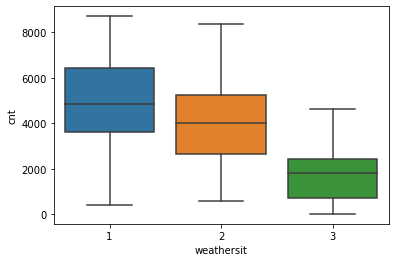

In [7]:
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_data)

## The hypothesis being tested
https://statisticsbyjim.com/anova/post-hoc-tests-anova/

* __H0: No difference between means, i.e. x1 = x2 = x3__
* __Ha: Difference between means exist somewhere, i.e. x1 != x2 != x3, or x1 = x2 != ?x3, or x1 != ?x2 = x3__

### ANOVA with `scipy.stats`

In [16]:
from scipy import stats

In [17]:
stats.f_oneway(bike_sharing_data[bike_sharing_data['weathersit'] == 1]['cnt'],
               bike_sharing_data[bike_sharing_data['weathersit'] == 2]['cnt'],
               bike_sharing_data[bike_sharing_data['weathersit'] == 3]['cnt'])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

O problema da análise de variância (ANOVA) é que apesar de você descobrir que a hipótese nula não é verdadeira, você não sabe qual amostra erra diferente de qual. Você só sabe que as três não possuem a mesma média.

### `Tukey's method`

Compare each pair with each other. The null-hypothesis is that each pair's mean is equal. If the p-value is lower than 0.05, we can reject the null-hypothesis with a 95% level of confidence, i.e., you can reject the fact that they have the same mean.

https://www.statisticshowto.datasciencecentral.com/tukey-test-honest-significant-difference/

In [72]:
data = bike_sharing_data.drop(bike_sharing_data.loc[bike_sharing_data.weathersit == 2].sample(220).index)
data = data.drop(data.loc[data.weathersit == 1].sample(150).index)

<IPython.core.display.Javascript object>

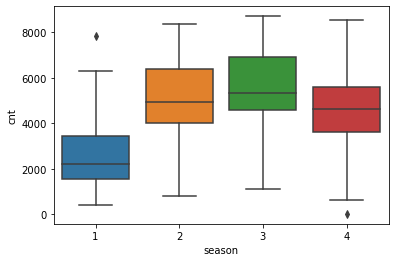

In [19]:
sns.boxplot(x='season',y='cnt', data=bike_sharing_data)

In [21]:
stats.f_oneway(bike_sharing_data[bike_sharing_data['season'] == 1]['cnt'],
               bike_sharing_data[bike_sharing_data['season'] == 2]['cnt'],
               bike_sharing_data[bike_sharing_data['season'] == 3]['cnt'],
               bike_sharing_data[bike_sharing_data['season'] == 4]['cnt'])

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

In [23]:
from statsmodels.stats.multicomp import MultiComparison

multi_comp = MultiComparison(bike_sharing_data['cnt'], 
                             bike_sharing_data['season'])

mul_result = multi_comp.tukeyhsd()

print(mul_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2 2388.1989  0.001  1965.3265 2811.0714   True
     1      3 3040.1706  0.001  2619.5349 3460.8063   True
     1      4 2124.0303  0.001  1697.6383 2550.4224   True
     2      3  651.9717  0.001   233.0867 1070.8566   True
     2      4 -264.1686 0.3792  -688.8337  160.4965  False
     3      4 -916.1403  0.001 -1338.5781 -493.7025   True
----------------------------------------------------------


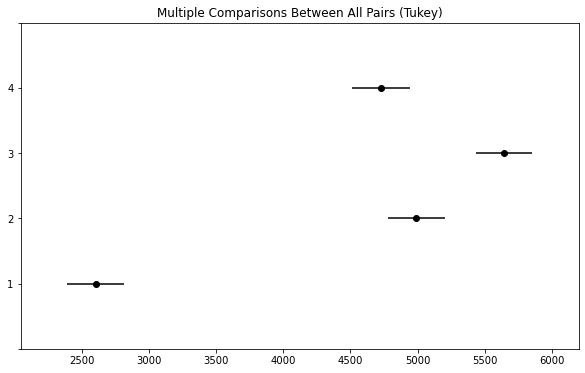

In [24]:
mul_result.plot_simultaneous();

### ANOVA with `statsmodels`
https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html

In [25]:
import statsmodels.api as sm

from statsmodels.api import OLS

In [26]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
X = pd.get_dummies(bike_sharing_data[['weathersit']].astype(str), drop_first=True)
X

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
726,1,0
727,1,0
728,1,0
729,0,0


In [29]:
X = pd.get_dummies(bike_sharing_data[['weathersit']].astype(str), drop_first=True)
y = bike_sharing_data.cnt

X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Thu, 07 May 2020   Prob (F-statistic):           3.11e-17
Time:                        21:44:01   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4876.7862     85.567     56.994      0.000    4708.798    5044.774
weathersit_2  -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
weathersit_3 -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
## Using R-style formulas in ols

# https://www.statsmodels.org/devel/example_formulas.html

In [30]:
from statsmodels.formula.api import ols

In [31]:
bike_sharing_data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [33]:
result = ols('cnt ~ temp', data = bike_sharing_data).fit()


result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.81e-81
Time:                        21:53:09   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.000     898.242    1531.042
temp        6640.7100    305.188     21.759      0.000    6041.558    7239.862
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
bike_sharing_data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


In [34]:
result = ols('cnt ~ temp + atemp', data = bike_sharing_data).fit()


result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     241.1
Date:                Thu, 07 May 2020   Prob (F-statistic):           4.62e-81
Time:                        21:54:14   Log-Likelihood:                -6383.9
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     728   BIC:                         1.279e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.0365    188.362      5.208      0.000     611.238    1350.835
temp        1066.2120   2366.347      0.451      0.652   -3579.466    5711.890
atemp       6314.1183   2658.070      2.375      0.018    1095.722    1.15e+04
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.302
Skew:                           0.148   Prob(JB):                      0.00579
Kurtosis:                       2.499   Cond. No.                         77.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
result = ols('cnt ~ temp + windspeed + C(workingday) * C(weathersit)', data = bike_sharing_data).fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     92.55
Date:                Thu, 07 May 2020   Prob (F-statistic):           4.19e-96
Time:                        21:57:07   Log-Likelihood:                -6335.8
No. Observations:                 731   AIC:                         1.269e+04
Df Residuals:                     723   BIC:                         1.272e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2175.0146    239.166      9.094      0.000    1705.471    2644.558
C(workingday)[T.1]                      246.6278    139.254      1.771      0.077     -26.762     520.017
C(weathersit)[T.2]                     -503.2432    203.716     -2.470      0.014    -903.189    -103.297
C(weathersit)[T.3]                    -1725.5089    647.333     -2.666      0.008   -2996.386    -454.632
C(workingday)[T.1]:C(weathersit)[T.2]  -154.3295    243.349     -0.634      0.526    -632.085     323.426
C(workingday)[T.1]:C(weathersit)[T.3]  -955.1127    739.534     -1.292      0.197   -2407.003     496.778
temp                                   6126.3270    292.040     20.978      0.000    5552.979    6699.675
windspeed                             -3130.7293    690.616     -4.533      0.000   -4486.582   -1774.876
==============================================================================
Omnibus:                       25.596   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.851
Skew:                           0.243   Prob(JB):                     0.000219
Kurtosis:                       2.437   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""